Official documentation:
http://powietrze.gios.gov.pl/pjp/content/api#

In [1]:
%matplotlib inline

In [165]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

Getting all stations:

In [36]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/station/findAll')

In [37]:
allStations = json_normalize(r.json())

In [5]:
print(allStations[allStations["city.name"] == u"Gdańsk"])

                   addressStreet  city city.commune.communeName  \
27   ul. Powstańców Warszawskich   NaN                   Gdańsk   
46                  ul. Leczkowa   NaN                   Gdańsk   
47                 ul. Ostrzycka   NaN                   Gdańsk   
120                 ul. Kaczeńce   NaN                   Gdańsk   
143               ul. Wyzwolenia   NaN                   Gdańsk   

    city.commune.districtName city.commune.provinceName  city.id city.name  \
27                     Gdańsk                 POMORSKIE    218.0    Gdańsk   
46                     Gdańsk                 POMORSKIE    218.0    Gdańsk   
47                     Gdańsk                 POMORSKIE    218.0    Gdańsk   
120                    Gdańsk                 POMORSKIE    218.0    Gdańsk   
143                    Gdańsk                 POMORSKIE    218.0    Gdańsk   

    dateEnd            dateStart    gegrLat    gegrLon   id  \
27     None  1996-10-01 00:00:00  54.353336  18.635283  729   
46

Lets see what we have in "AM5 Gdańsk Szadółki" which has id: 733

In [6]:
stationId = 733

In [7]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/station/sensors/' + str(stationId))

In [8]:
sensors = json_normalize(r.json())

In [9]:
print(sensors)

     id  param.idParam param.paramCode param.paramFormula  \
0  4720              8              CO                 CO   
1  4727              3            PM10               PM10   
2  4723              6             NO2                NO2   
3  4725              5              O3                 O3   
4  4730              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0         tlenek węgla          None  1998-05-01 00:00:00        733  
1  pył zawieszony PM10          None  1998-05-01 00:00:00        733  
2      dwutlenek azotu          None  1998-05-01 00:00:00        733  
3                 ozon          None  1998-05-01 00:00:00        733  
4     dwutlenek siarki          None  1998-05-01 00:00:00        733  


Lets now see data about O3 concentration - sensorId = 4725

In [23]:
sensorId = 4725

In [24]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/' + str(sensorId))

In [25]:
concentration = json_normalize(r.json())

In [26]:
concentrationFrame = pd.DataFrame()

In [27]:
concentrationFrame["dates"] = [d[u'date'] for d in concentration["values"].values.item()]
concentrationFrame["values"] = [d[u'value'] for d in concentration["values"].values.item()]

In [28]:
concentrationFrame.set_index(["dates"], inplace=True)
#concentrationFrame.sort_index(inplace=True)
# We cannot sort index, because it is not unique. There is 12 hours notation used, but without AM/PM distinction ;(
# But we can just reverse it until API will be fixed
concentrationFrame = concentrationFrame.iloc[::-1]

In [29]:
print(concentrationFrame)

                       values
dates                        
2017-09-28 01:00:00  39.75330
2017-09-28 02:00:00  50.82890
2017-09-28 03:00:00  58.86440
2017-09-28 04:00:00  45.70720
2017-09-28 05:00:00  42.51000
2017-09-28 06:00:00  83.89330
2017-09-28 07:00:00  52.07940
2017-09-28 08:00:00  23.49780
2017-09-28 09:00:00  19.13890
2017-09-28 10:00:00  33.90280
2017-09-28 11:00:00  40.63330
2017-09-28 12:00:00  48.43220
2017-09-28 13:00:00  54.39560
2017-09-28 14:00:00  55.71500
2017-09-28 15:00:00  63.96330
2017-09-28 16:00:00  66.22280
2017-09-28 17:00:00  64.46610
2017-09-28 18:00:00  52.28220
2017-09-28 19:00:00  40.60670
2017-09-28 20:00:00  38.34560
2017-09-28 21:00:00  46.36560
2017-09-28 22:00:00  58.75940
2017-09-28 23:00:00  50.17220
2017-09-29 00:00:00  31.58000
2017-09-29 01:00:00  17.13060
2017-09-29 02:00:00   4.32667
2017-09-29 03:00:00   4.16278
2017-09-29 04:00:00   6.48444
2017-09-29 05:00:00  20.36330
2017-09-29 06:00:00  10.55280
2017-09-29 07:00:00  20.38940
2017-09-29

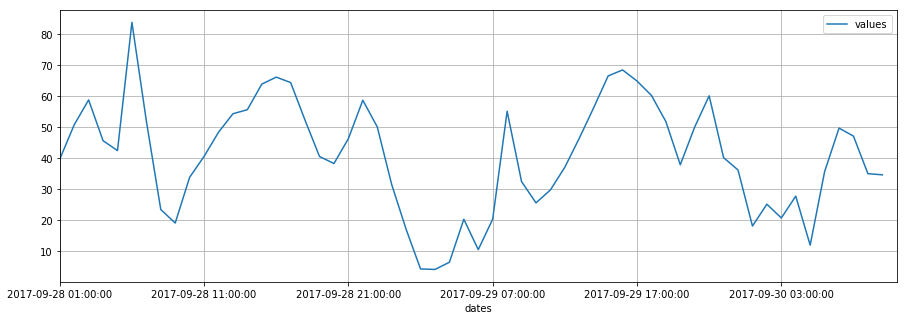

In [30]:
concentrationFrame.plot(figsize=(15,5), grid=True)

And overall air quality index for the same station

In [31]:
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/aqindex/getIndex/' + str(stationId))

In [32]:
r.json()

{u'c6h6CalcDate': None,
 u'c6h6IndexLevel': None,
 u'c6h6SourceDataDate': None,
 u'coCalcDate': u'2017-09-30 11:17:42',
 u'coIndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'coSourceDataDate': u'2017-09-30 10:00:00',
 u'id': 733,
 u'no2CalcDate': u'2017-09-30 11:17:42',
 u'no2IndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'no2SourceDataDate': u'2017-09-30 10:00:00',
 u'o3CalcDate': u'2017-09-30 11:17:42',
 u'o3IndexLevel': {u'id': 1, u'indexLevelName': u'Dobry'},
 u'o3SourceDataDate': u'2017-09-30 10:00:00',
 u'pm10CalcDate': u'2017-09-30 11:17:42',
 u'pm10IndexLevel': None,
 u'pm10SourceDataDate': None,
 u'pm25CalcDate': u'2017-09-30 11:17:42',
 u'pm25IndexLevel': None,
 u'pm25SourceDataDate': None,
 u'so2CalcDate': u'2017-09-30 11:17:42',
 u'so2IndexLevel': {u'id': 0, u'indexLevelName': u'Bardzo dobry'},
 u'so2SourceDataDate': u'2017-09-30 10:00:00',
 u'stCalcDate': u'2017-09-30 11:17:42',
 u'stIndexLevel': {u'id': 1, u'indexLevelName': u'Dobry'},
 u'st

In [38]:
allStations

,addressStreet,city,city.commune.communeName,city.commune.districtName,city.commune.provinceName,city.id,city.name,dateEnd,dateStart,gegrLat,gegrLon,id,stationName
0,ul. Orzechowa,NaN,Biała Podlaska,Biała Podlaska,LUBELSKIE,26.0,Biała Podlaska,None,1993-04-07 00:00:00,52.029194,23.149389,236,BiałaP-Orzechowa
1,ul. Waszyngtona 16,NaN,Białystok,Białystok,PODLASKIE,35.0,Białystok,None,2004-09-01 00:00:00,53.126689,23.155869,605,Białystok-Miejska
2,ul. 42 Pułku Piechoty,NaN,Białystok,Białystok,PODLASKIE,35.0,Białystok,None,2004-09-01 00:00:00,53.138614,23.229903,606,Białystok-Podmiejska
3,ul. Kopalniana,NaN,Czerwionka-Leszczyny,rybnicki,ŚLĄSKIE,145.0,Czerwionka-Leszczyny,None,2013-12-22 00:00:00,50.16385,18.659977,9000,"Czerwionka-Leszczyny, ul. Kopalniana"
4,ul. Piłsudskiego 26,NaN,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE,198.0,Dzierżoniów,None,2005-01-01 00:00:00,50.732817,16.648050,16,Dzierżoniów - Piłsudskiego
5,ul. Ogińskiego 6,NaN,Jelenia Góra,Jelenia Góra,DOLNOŚLĄSKIE,319.0,Jelenia Góra,None,2014-10-20 00:00:00,50.913433,15.765608,9153,Jelenia Góra - Ogińskiego
6,ul. Wały Gen. Sikorskiego 12,NaN,Toruń,Toruń,KUJAWSKO-POMORSKIE,966.0,Toruń,None,2012-03-01 00:00:00,53.012261,18.606203,145,Toruń Airpointer
7,ul. Wyb. J.Conrada-Korzeniowskiego 18,NaN,Wrocław,Wrocław,DOLNOŚLĄSKIE,1064.0,Wrocław,None,2005-01-01 00:00:00,51.129378,17.029250,117,Wrocław - Korzeniowskiego
8,al. Górnośląska,NaN,Katowice,Katowice,ŚLĄSKIE,350.0,Katowice,None,2011-01-01 00:00:00,50.246795,19.019469,813,"Katowice, ul. Plebiscytowa/A4"
9,ul. Bolesława Śmiałego 5,NaN,Kędzierzyn-Koźle,kędzierzyńsko-kozielski,OPOLSKIE,355.0,Kędzierzyn-Koźle,None,2005-01-01 00:00:00,50.349608,18.236575,568,K-Koźle automat 1


In [83]:
stationsId = allStations["id"]

In [84]:
sid = list(stationsId)

In [85]:
allsensors = pd.DataFrame()

In [86]:
for station in sid:
    print(station)
    sensorlist = json_normalize(requests.get('http://api.gios.gov.pl/pjp-api/rest/station/sensors/' + str(station)).json())
    print(sensorlist)
    print("--------------------------")
    allsensors = allsensors.append(sensorlist)
    #if station == 9000:
    #    break

236
      id  param.idParam param.paramCode param.paramFormula   param.paramName  \
0  15727              6             NO2                NO2   dwutlenek azotu   
1   1676              5              O3                 O3              ozon   
2  14348              1             SO2                SO2  dwutlenek siarki   

  sensorDateEnd      sensorDateStart  stationId  
0          None  2015-07-01 00:00:00        236  
1          None  2010-01-01 00:00:00        236  
2          None  2014-01-01 00:00:00        236  
--------------------------
605
     id  param.idParam param.paramCode param.paramFormula  \
0  3996              8              CO                 CO   
1  4001              6             NO2                NO2   
2  4005             69           PM2.5              PM2.5   
3  4006              1             SO2                SO2   

        param.paramName sensorDateEnd      sensorDateStart  stationId  
0          tlenek węgla          None  2004-09-01 00:00:00        

      id  param.idParam param.paramCode param.paramFormula  \
0  16228              8              CO                 CO   
1  16250              3            PM10               PM10   
2  16249             10            C6H6               C6H6   
3  16231              6             NO2                NO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0         tlenek węgla          None  2015-11-27 00:00:00      10058  
1  pył zawieszony PM10          None  2015-11-27 00:00:00      10058  
2               benzen          None  2015-11-27 00:00:00      10058  
3      dwutlenek azotu          None  2015-11-27 00:00:00      10058  
--------------------------
67
      id  param.idParam param.paramCode param.paramFormula  \
0  14706              3            PM10               PM10   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0  pył zawieszony PM10          None  2014-10-20 00:00:00         67  
--------------------------
488
      

     id  param.idParam param.paramCode param.paramFormula  \
0  2035              3            PM10               PM10   
1  2031              6             NO2                NO2   
2  2033              5              O3                 O3   
3  2039              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0  pył zawieszony PM10          None  2003-11-01 00:00:00        291  
1      dwutlenek azotu          None  2003-11-01 00:00:00        291  
2                 ozon          None  2003-11-01 00:00:00        291  
3     dwutlenek siarki          None  2009-01-15 00:00:00        291  
--------------------------
729
     id  param.idParam param.paramCode param.paramFormula  \
0  4676              8              CO                 CO   
1  4681              3            PM10               PM10   
2  4679              6             NO2                NO2   
3  4683              1             SO2                SO2   

  

      id  param.idParam param.paramCode param.paramFormula  \
0   5085              3            PM10               PM10   
1   5083              6             NO2                NO2   
2  14878              5              O3                 O3   
3   5087              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0  pył zawieszony PM10          None  2010-01-01 00:00:00        769  
1      dwutlenek azotu          None  2010-03-22 00:00:00        769  
2                 ozon          None  2014-03-25 00:00:00        769  
3     dwutlenek siarki          None  2010-03-22 00:00:00        769  
--------------------------
314
     id  param.idParam param.paramCode param.paramFormula  \
0  2199              3            PM10               PM10   
1  2195              6             NO2                NO2   
2  2197              5              O3                 O3   
3  2204              1             SO2                SO2  

    id  param.idParam param.paramCode param.paramFormula      param.paramName  \
0  608              8              CO                 CO         tlenek węgla   
1  618              3            PM10               PM10  pył zawieszony PM10   
2  605             10            C6H6               C6H6               benzen   
3  614              6             NO2                NO2      dwutlenek azotu   
4  616              5              O3                 O3                 ozon   
5  621              1             SO2                SO2     dwutlenek siarki   

  sensorDateEnd      sensorDateStart  stationId  
0          None  2005-01-01 00:00:00        109  
1          None  2005-03-20 00:00:00        109  
2          None  2005-01-01 00:00:00        109  
3          None  2005-01-01 00:00:00        109  
4          None  2005-01-01 00:00:00        109  
5          None  2005-01-01 00:00:00        109  
--------------------------
9202
      id  param.idParam param.paramCode param.para

      id  param.idParam param.paramCode param.paramFormula  \
0  17184              3            PM10               PM10   
1  17185             69           PM2.5              PM2.5   

        param.paramName sensorDateEnd      sensorDateStart  stationId  
0   pył zawieszony PM10          None  2017-01-01 00:00:00      10414  
1  pył zawieszony PM2.5          None  2017-01-01 00:00:00      10414  
--------------------------
789
     id  param.idParam param.paramCode param.paramFormula  \
0  5158              8              CO                 CO   
1  5167              3            PM10               PM10   
2  5162              6             NO2                NO2   
3  5164              5              O3                 O3   
4  5171              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0         tlenek węgla          None  2005-01-01 00:00:00        789  
1  pył zawieszony PM10          None  2005-01-01 00:00:00

     id  param.idParam param.paramCode param.paramFormula  \
0  6322              3            PM10               PM10   
1  6320              6             NO2                NO2   
2  6324              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0  pył zawieszony PM10          None  2011-01-01 00:00:00        983  
1      dwutlenek azotu          None  2011-01-01 00:00:00        983  
2     dwutlenek siarki          None  2011-01-01 00:00:00        983  
--------------------------
950
      id  param.idParam param.paramCode param.paramFormula  \
0  14892              3            PM10               PM10   
1  16526             10            C6H6               C6H6   
2   6140              6             NO2                NO2   
3   6142              5              O3                 O3   
4   6144              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationI

    id  param.idParam param.paramCode param.paramFormula      param.paramName  \
0  224              3            PM10               PM10  pył zawieszony PM10   
1  221              6             NO2                NO2      dwutlenek azotu   
2  223              5              O3                 O3                 ozon   
3  225              1             SO2                SO2     dwutlenek siarki   

  sensorDateEnd      sensorDateStart  stationId  
0          None  2009-06-05 00:00:00         38  
1          None  2009-06-05 00:00:00         38  
2          None  2009-06-05 00:00:00         38  
3          None  2009-06-05 00:00:00         38  
--------------------------
10435
      id  param.idParam param.paramCode param.paramFormula  \
0  17243              3            PM10               PM10   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0  pył zawieszony PM10          None  2017-01-01 00:00:00      10435  
--------------------------
743
     id  para

     id  param.idParam param.paramCode param.paramFormula  param.paramName  \
0  1048             10            C6H6               C6H6           benzen   
1  1061              6             NO2                NO2  dwutlenek azotu   
2  1063              5              O3                 O3             ozon   

  sensorDateEnd      sensorDateStart  stationId  
0          None  2011-01-01 00:00:00        164  
1          None  2007-03-01 00:00:00        164  
2          None  2007-03-01 00:00:00        164  
--------------------------
11
   id  param.idParam param.paramCode param.paramFormula   param.paramName  \
0  50              6             NO2                NO2   dwutlenek azotu   
1  52              5              O3                 O3              ozon   
2  56              1             SO2                SO2  dwutlenek siarki   

  sensorDateEnd      sensorDateStart  stationId  
0          None  1996-07-01 00:00:00         11  
1          None  1996-07-01 00:00:00         11 

      id  param.idParam param.paramCode param.paramFormula  \
0   4274              8              CO                 CO   
1  14416              3            PM10               PM10   
2   4278              6             NO2                NO2   
3  14448              5              O3                 O3   
4   4285              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0         tlenek węgla          None  2006-07-01 00:00:00        659  
1  pył zawieszony PM10          None  2014-04-01 00:00:00        659  
2      dwutlenek azotu          None  2006-07-01 00:00:00        659  
3                 ozon          None  2014-04-04 00:00:00        659  
4     dwutlenek siarki          None  2006-07-01 00:00:00        659  
--------------------------
426
     id  param.idParam param.paramCode param.paramFormula  \
0  2941              3            PM10               PM10   
1  2938              6             NO2          

     id  param.idParam param.paramCode param.paramFormula  \
0  5618              3            PM10               PM10   
1  5600             10            C6H6               C6H6   
2  5612              6             NO2                NO2   
3  5619             69           PM2.5              PM2.5   
4  5615              5              O3                 O3   
5  5623              1             SO2                SO2   

        param.paramName sensorDateEnd      sensorDateStart  stationId  
0   pył zawieszony PM10          None  2005-01-01 00:00:00        853  
1                benzen          None  2013-01-01 00:00:00        853  
2       dwutlenek azotu          None  2005-01-01 00:00:00        853  
3  pył zawieszony PM2.5          None  2013-01-01 00:00:00        853  
4                  ozon          None  2005-01-01 00:00:00        853  
5      dwutlenek siarki          None  2005-01-01 00:00:00        853  
--------------------------
10554
      id  param.idParam param.param

     id  param.idParam param.paramCode param.paramFormula   param.paramName  \
0  3199              8              CO                 CO      tlenek węgla   
1  3201              6             NO2                NO2   dwutlenek azotu   
2  3203              5              O3                 O3              ozon   
3  3205              1             SO2                SO2  dwutlenek siarki   

  sensorDateEnd      sensorDateStart  stationId  
0          None  1991-07-01 00:00:00        460  
1          None  1991-07-01 00:00:00        460  
2          None  1991-07-01 00:00:00        460  
3          None  1991-07-01 00:00:00        460  
--------------------------
156
    id  param.idParam param.paramCode param.paramFormula  \
0  952              8              CO                 CO   
1  965              3            PM10               PM10   
2  949             10            C6H6               C6H6   
3  959              6             NO2                NO2   
4  966             69  

     id  param.idParam param.paramCode param.paramFormula  \
0  4834              8              CO                 CO   
1  4845              3            PM10               PM10   
2  4840              6             NO2                NO2   
3  4842              5              O3                 O3   
4  4848              1             SO2                SO2   

       param.paramName sensorDateEnd      sensorDateStart  stationId  
0         tlenek węgla          None  2012-01-01 00:00:00        741  
1  pył zawieszony PM10          None  2012-01-01 00:00:00        741  
2      dwutlenek azotu          None  2012-01-01 00:00:00        741  
3                 ozon          None  2012-01-01 00:00:00        741  
4     dwutlenek siarki          None  2012-01-01 00:00:00        741  
--------------------------
10254
      id  param.idParam param.paramCode param.paramFormula  \
0  16905              3            PM10               PM10   
1  16904              1             SO2           

In [87]:
allsensors

,id,param.idParam,param.paramCode,param.paramFormula,param.paramName,sensorDateEnd,sensorDateStart,stationId
0,15727,6,NO2,NO2,dwutlenek azotu,None,2015-07-01 00:00:00,236
1,1676,5,O3,O3,ozon,None,2010-01-01 00:00:00,236
2,14348,1,SO2,SO2,dwutlenek siarki,None,2014-01-01 00:00:00,236
0,3996,8,CO,CO,tlenek węgla,None,2004-09-01 00:00:00,605
1,4001,6,NO2,NO2,dwutlenek azotu,None,2004-09-01 00:00:00,605
2,4005,69,PM2.5,PM2.5,pył zawieszony PM2.5,None,2009-07-01 00:00:00,605
3,4006,1,SO2,SO2,dwutlenek siarki,None,2004-09-01 00:00:00,605
0,4011,6,NO2,NO2,dwutlenek azotu,None,2004-09-01 00:00:00,606
1,4013,5,O3,O3,ozon,None,2004-09-01 00:00:00,606
2,4016,1,SO2,SO2,dwutlenek siarki,None,2004-09-01 00:00:00,606


In [91]:
allStations[["id", "gegrLat", "gegrLon"]]

,id,gegrLat,gegrLon
0,236,52.029194,23.149389
1,605,53.126689,23.155869
2,606,53.138614,23.229903
3,9000,50.16385,18.659977
4,16,50.732817,16.648050
5,9153,50.913433,15.765608
6,145,53.012261,18.606203
7,117,51.129378,17.029250
8,813,50.246795,19.019469
9,568,50.349608,18.236575


In [155]:
finalData = pd.merge(allsensors, allStations[["id", "gegrLat", "gegrLon"]], how='inner', left_on="stationId", right_on="id")


In [166]:
def get_latest_measurement(sensorId):
    concentration = json_normalize(requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/' + str(sensorId)).json())
    concentrationFrame = pd.DataFrame()
    concentrationFrame["dates"] = [d[u'date'] for d in concentration["values"].values.item()]
    concentrationFrame["values"] = [d[u'value'] for d in concentration["values"].values.item()]
    concentrationFrame["dates"] = pd.to_datetime(concentrationFrame["dates"])
    #print(concentrationFrame[concentrationFrame["dates"] == previousHourStr]["values"])
    try:
        return_value = concentrationFrame[concentrationFrame["dates"] == previousHourStr]["values"].item()
    except ValueError:
        return_value = np.NaN
    #print(return_value)
    return return_value

In [154]:
get_latest_measurement(sensorId=sensorId)

34.6944

In [116]:
import datetime

In [129]:
previousHour = datetime.datetime.now() - datetime.timedelta(hours = 1)


In [136]:
previousHourStr = previousHour.strftime('%Y-%m-%d %H:00:00')

In [149]:
sdfasd[sdfasd["dates"] == previousHourStr]["values"].item()

34.6944

In [168]:
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

0it [00:00, ?it/s]


In [169]:
finalData["value"] = finalData["id_x"].progress_map(get_latest_measurement)

650it [03:01,  5.31it/s]


In [170]:
finalData

,id_x,param.idParam,param.paramCode,param.paramFormula,param.paramName,sensorDateEnd,sensorDateStart,stationId,id_y,gegrLat,gegrLon,value
0,15727,6,NO2,NO2,dwutlenek azotu,None,2015-07-01 00:00:00,236,236,52.029194,23.149389,13.10000
1,1676,5,O3,O3,ozon,None,2010-01-01 00:00:00,236,236,52.029194,23.149389,32.64000
2,14348,1,SO2,SO2,dwutlenek siarki,None,2014-01-01 00:00:00,236,236,52.029194,23.149389,36.76000
3,3996,8,CO,CO,tlenek węgla,None,2004-09-01 00:00:00,605,605,53.126689,23.155869,365.00000
4,4001,6,NO2,NO2,dwutlenek azotu,None,2004-09-01 00:00:00,605,605,53.126689,23.155869,11.90000
5,4005,69,PM2.5,PM2.5,pył zawieszony PM2.5,None,2009-07-01 00:00:00,605,605,53.126689,23.155869,22.00000
6,4006,1,SO2,SO2,dwutlenek siarki,None,2004-09-01 00:00:00,605,605,53.126689,23.155869,3.90000
7,4011,6,NO2,NO2,dwutlenek azotu,None,2004-09-01 00:00:00,606,606,53.138614,23.229903,3.70000
8,4013,5,O3,O3,ozon,None,2004-09-01 00:00:00,606,606,53.138614,23.229903,46.00000
9,4016,1,SO2,SO2,dwutlenek siarki,None,2004-09-01 00:00:00,606,606,53.138614,23.229903,4.10000
